## finding distance

In [1]:
import numpy as np

In [4]:
def distance(p1, p2):
    return np.sqrt(np.sum(np.power(p2 - p1, 2)))

In [5]:
p1 = np.array([1, 1])
p2 = np.array([4, 4])
print(distance(p1, p2))

4.24264068712


## majority vote

In [15]:
import random

In [20]:
def count_votes(votes):
    """
    Return dictionary vote:counts (number that 
    each vote is repeated in votes).
    """
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
    return vote_counts        

In [21]:
votes = [1, 2, 3, 1, 2, 3, 3, 3, 3, 3]
vote_counts = count_votes(votes)
print(vote_counts)

{1: 2, 2: 2, 3: 6}


In [22]:
print(max(vote_counts.values()))

6


In [24]:
def majority_vote(votes):
    """
    Return the most common element in votes
    """
    winners = []
    vote_counts = count_votes(votes)
    max_count = max(vote_counts.values())
    for (vote, count) in vote_counts.items():
        if count == max_count:
            winners.append(vote)
    return random.choice(winners) 

In [25]:
votes = [1, 2, 3, 1, 2, 3, 3, 3, 3, 3]
vote_counts = majority_vote(votes)
print(vote_counts)

3


In [33]:
votes = [1, 2, 3, 1, 2, 3, 3, 3, 3, 2, 2, 2]
vote_counts = majority_vote(votes)
print(vote_counts)

3


In [35]:
# we may simplify this function if we note 
# that we're looking for a *mode* of a numpy array
# (mode - is the most common element)
import scipy.stats as ss

In [36]:
def majority_vote_short(votes):
    """
    Return the most common element in votes
    """
    (mode, count) = ss.mstats.mode(votes)
    return mode

In [41]:
votes = [1, 2, 3, 1, 2, 3, 3, 3, 3, 2, 2, 2]
vote_counts = majority_vote_short(votes)
print(vote_counts)

[ 2.]


## finding nearest neighbors

In [57]:
import matplotlib.pyplot as plt

In [58]:
% matplotlib inline

In [59]:
points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])

In [60]:
p = np.array([2.5, 2])

[0.5, 3.5, 0.5, 3.5]

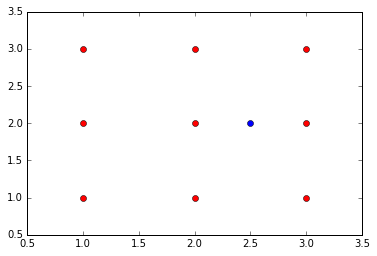

In [66]:
plt.plot(points[:,0], points[:,1], 'ro');
plt.plot(p[0], p[1], 'bo')
plt.axis([0.5, 3.5, 0.5, 3.5])

In [67]:
distances = np.zeros(points.shape[0])
for i in range(len(distances)):
    distances[i] = distance(p, points[i])

In [68]:
distances

array([ 1.80277564,  1.5       ,  1.80277564,  1.11803399,  0.5       ,
        1.11803399,  1.11803399,  0.5       ,  1.11803399])

In [74]:
# we interested in index of sorted array, not
# array itself
ind = np.argsort(distances)

In [75]:
distances[ind]

array([ 0.5       ,  0.5       ,  1.11803399,  1.11803399,  1.11803399,
        1.11803399,  1.5       ,  1.80277564,  1.80277564])

In [77]:
# 2 nearest points
points[ind[:2]]

array([[2, 2],
       [3, 2]])

In [78]:
def find_nearest_neighbors(p, points, k=5):
    """Find the k nearest neighbors of point p and retusrn their indices"""
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]

In [79]:
ind = find_nearest_neighbors(p, points)
points[ind[:2]]

array([[2, 2],
       [3, 2]])

In [85]:
def knn_predict(p, points, outcomes, k=5):
    """
    Find k nearest points and return dominant color 
    (stored in outcomes)
    """
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote(outcomes[ind])

In [86]:
outcomes = np.array([0,0,0,0,1,1,1,1,1])

In [89]:
knn_predict(np.array([2.5, 2.7]), points, outcomes, k=2)

1

In [90]:
knn_predict(np.array([1.0, 2.7]), points, outcomes, k=2)

0

## generate syntetic data

In [92]:
np.concatenate((ss.norm(0,1).rvs((5,2)), ss.norm(1,1).rvs((5,2))), axis=0)

array([[ 0.74141117,  1.22232995],
       [ 0.80251208, -0.47068029],
       [ 2.00952666,  0.85482347],
       [ 0.38379672,  1.10727667],
       [ 0.40819708,  0.71378571],
       [ 0.27352227,  1.22008502],
       [ 1.58535963,  1.32562886],
       [ 0.3283519 ,  2.86794704],
       [ 0.62674628,  1.58029975],
       [ 1.96197132,  1.73730014]])

In [93]:
n = 5
outcome = np.concatenate((np.repeat(0, n), np.repeat(1,n)))
print(outcome)

[0 0 0 0 0 1 1 1 1 1]


In [131]:
def generate_synth_data(n=50):
    """Create 2 sets of points from bivariate normal distribution"""
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis=0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1,n)))
    return (points, outcomes)

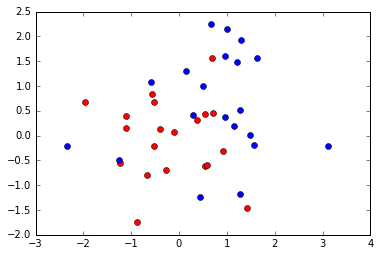

In [132]:
n = 20
plt.figure();
plt.plot(points[:n,0], points[:n,1], "ro");
plt.plot(points[n:,0], points[n:,1], "bo");

In [118]:
! git add .; git ci -m "done 1st part of kNN case"; git push

[master 717278b] done 1st part of kNN case
 1 file changed, 793 insertions(+)
 create mode 100644 lectures/week3/kNN/kNN.ipynb
Counting objects: 6, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (6/6), 13.56 KiB | 0 bytes/s, done.
Total 6 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:ilyarudyak/PH526x_python_research.git
   96c48c4..717278b  master -> master


## making a prediction greed

In [119]:
seasons = ["spring", "summer", "fall", "winter"]

In [121]:
list(enumerate(seasons))

[(0, 'spring'), (1, 'summer'), (2, 'fall'), (3, 'winter')]

In [122]:
for i, season in enumerate(seasons):
    print('{}:{}'.format(i, season))

0:spring
1:summer
2:fall
3:winter


In [125]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    """Classify each point on the prediction grid"""
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype=int)
    for (i, x) in enumerate(xs):
        for (j, y) in enumerate(ys):
            p = np.array([x, y])
            prediction_grid[j, i] = knn_predict(p, predictors, outcomes, k)
    return (xx, yy, prediction_grid)

## plotting prediction grid

In [126]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

In [133]:
(predictors, outcomes) = generate_synth_data()

In [134]:
predictors.shape

(100, 2)

In [135]:
outcomes.shape

(100,)

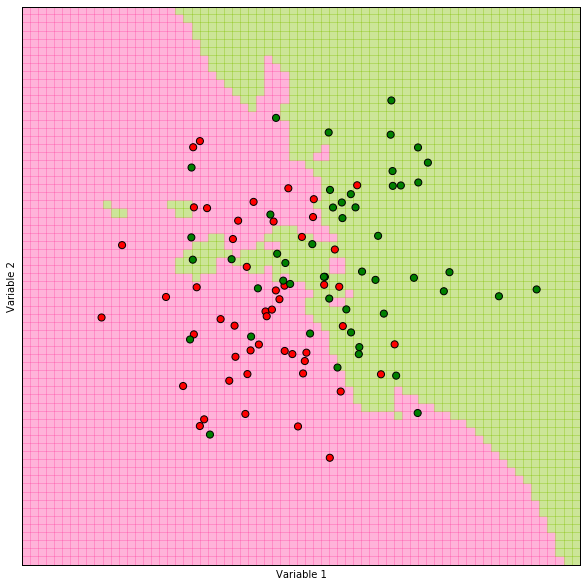

In [139]:
k=5; filename='knn_synth_5.pdf'; limits = (-3, 4, -3, 4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid (xx, yy, prediction_grid, filename)

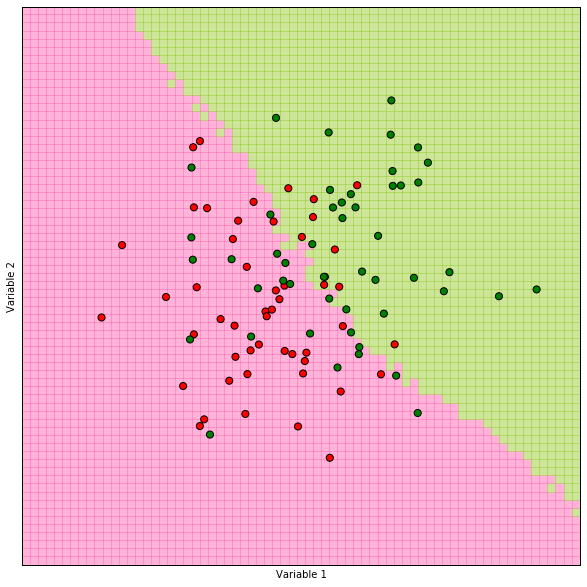

In [140]:
k=50; filename='knn_synth_50.pdf'; limits = (-3, 4, -3, 4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid (xx, yy, prediction_grid, filename)